# 線形回帰

In [1]:
import pandas as pd
import numpy as np
wine = pd.read_csv("winequality-red.csv",sep=";")

データファイルはあらかじめ以下からダウンロードしておく。
http://pythondatascience.plavox.info/wp-content/uploads/2016/07/winequality-red.csv

In [2]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


まず説明変数が1つだけの簡単なケースから。

In [3]:
X = wine.loc[:, ['density']].values # 説明変数 (1つ(density)だけ)
t = wine['alcohol'].values # 目的変数

In [4]:
X.shape

(1599, 1)

In [5]:
t.shape

(1599,)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

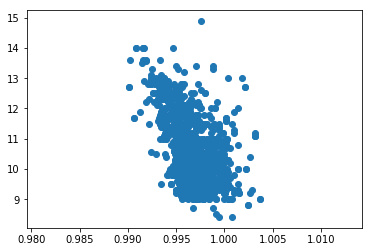

In [7]:
plt.scatter(X,t)

データセットを train と test に分けておく

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.1, random_state=0)

In [9]:
X_train.shape

(1439, 1)

K_train, K_test にデータ数(=行の数)を入れておく。

In [10]:
K_train = X_train.shape[0]
K_test = X_test.shape[0]

In [11]:
t_train.shape

(1439,)

線形回帰モデルは以下のように書くことができる。
$$y=\sum_{i=0}^m w_ix_i=\boldsymbol{w}^\top\boldsymbol{x}$$
ただし$\boldsymbol{x}$は$x_0=1$として拡張した説明変数ベクトル。
$\boldsymbol{w}$はモデルパラメータからなるベクトルであり、$w_0$はy切片を表す。

## scikit-learnを利用して線形回帰モデルを求める

In [12]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
slr.coef_

array([-282.98820702])

In [14]:
slr.intercept_

292.4870018262859

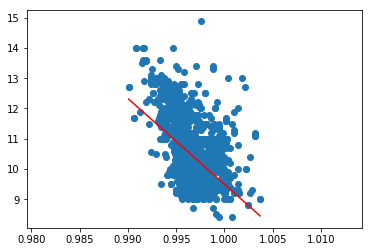

In [15]:
plt.scatter(X_train, t_train)
X_plot = np.array([np.min(X_train),np.max(X_train)])
plt.plot(X_plot,X_plot*slr.coef_ + slr.intercept_, color='red')

損失関数を以下の誤差二乗和で定義する。
\begin{align}
E&=\frac12\sum_k (y_k-t_k)^2 \\
&=\frac12\sum_k (\boldsymbol{w}^\top\boldsymbol{x}_k-t_k)^2 \\
&=\frac12 \|\boldsymbol{\mathsf{X}}\boldsymbol{w}-\boldsymbol{\mathsf{t}}\|^2
\end{align}
(ただし $\boldsymbol{\mathsf{X}}=(\boldsymbol{x}_1 \boldsymbol{x}_2 \cdots)^\top$,
$\boldsymbol{\mathsf{t}}=(t_1 t_2 \cdots)$ )

この式の $\boldsymbol{\mathsf{X}}$ は1で拡張されているので、それに合わせた X_train_a, X_test_a を作っておく。

In [16]:
X_train_a = np.column_stack((np.ones(K_train),X_train))
X_test_a = np.column_stack((np.ones(K_test),X_test))
X_test_a[0:10,:]

array([[1.     , 0.9982 ],
       [1.     , 0.99854],
       [1.     , 0.99516],
       [1.     , 0.9982 ],
       [1.     , 0.9969 ],
       [1.     , 0.99747],
       [1.     , 0.9966 ],
       [1.     , 0.99652],
       [1.     , 0.99616],
       [1.     , 0.9966 ]])

Scikit-learn で求めたモデルパラメータを w に入れる。

In [17]:
w = np.insert(slr.coef_, 0, slr.intercept_)
w

array([ 292.48700183, -282.98820702])

訓練データに関する誤差二乗和は

In [18]:
y_train = w.dot(X_train_a.T)
y_train[0:5],t[0:5]

(array([11.20804357, 10.65904645,  9.41389834,  9.44219716,  9.66858773]),
 array([9.4, 9.8, 9.8, 9.8, 9.4]))

In [19]:
E = 1/2 * (y_train-t_train).dot((y_train-t_train).T)
E

615.5460062629925

テストデータに関する誤差二乗和は

In [20]:
y_test = w.dot(X_test_a.T)
E = 1/2 * (y_test-t_test).dot((y_test-t_test).T)
E

68.47656628264926

もし $\boldsymbol{w}$ をランダムな値とすると

In [21]:
w = np.random.rand(2)
w

array([0.58016999, 0.54879542])

In [22]:
y_test = w.dot(X_test_a.T)
E = 1/2 * (y_test-t_test).dot((y_test-t_test).T)
E

7086.427740521598

線形回帰の問題とは、モデルパラメータ $\boldsymbol{w}$ を調整して損失関数をできるだけ小さくする問題であることを理解しよう。

## データの標準化
多くの機械学習アルゴリズムでは、最適な性能を得るためにデータのスケーリングが有効である。代表的なスケーリングの方法が標準化である。標準化は、平均が0、標準偏差が1になるようスケーリングすることである。詳細はPython機械学習プログラミング2.5.1, 3.2,1を参照。

In [23]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train_std = standardScaler.fit_transform(X_train)

標準化したデータで、再度線形回帰モデルを学習する。当然ながら最適なパラメータは別の値に変わる。

In [24]:
slr.fit(X_train_std, t_train)
w = np.insert(slr.coef_, 0, slr.intercept_)
w

array([10.41650452, -0.53397767])

In [25]:
X_train_a = np.column_stack((np.ones(K_train),X_train_std))
y_train = w.dot(X_train_a.T)
E = 1/2 * (y_train-t_train).dot((y_train-t_train).T)
E

615.5460062629932

学習した平均と標準偏差を使い、テストデータも標準化しておくのが大切である。

In [26]:
X_test_std = standardScaler.transform(X_test)
X_test_a = np.column_stack((np.ones(K_test),X_test_std))
y_test = w.dot(X_test_a.T)
E = 1/2 * (y_test-t_test).dot((y_test-t_test).T)
E

68.47656628264875

LinearRegressionの場合には、標準化は結果に影響を与えない。

# 課題
1. (基本) 線形回帰モデルの損失関数 $E$ を最小にするモデルパラメータは $\hat{\boldsymbol{w}}=(\boldsymbol{\mathsf{X}}^\top \boldsymbol{\mathsf{X}})^{-1} \boldsymbol{\mathsf{X}}^\top \boldsymbol{\mathsf{t}}$ となる(次の問題を参照)。numpyの行列演算を利用して、この値を計算せよ。
1. (基本) quality 以外の説明変数を全て利用してモデルを作り、誤差二乗和を評価せよ。
1. (発展) 損失関数 $E$ を $\boldsymbol{w}$ で微分してゼロとおくことにより、上の式を導出せよ。
1. (発展) 数値微分と勾配法によってモデルパラメータを求めよ。

In [27]:
# 「ゼロから作るDeep Learning」 p.104

def numerical_gradient(f, x):
    h = 1.0e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad